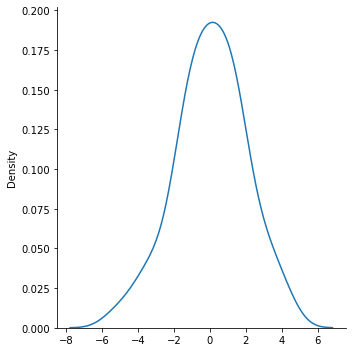

In [12]:
from numpy import random, array,exp,sqrt,pi,arange,log
import matplotlib.pyplot as plt
from collections import Counter
from pylab import plot,show
import seaborn as sns

#Get sample points and plot distribution
# stdev=2, variance = 4
x_points=random.normal(0,2,size=100)
sns.displot(x_points,kind='kde')
show()

In [18]:
#Funcions for calculating the posterior

def sumsq(array):
    'It returns the sum of the squares of the elements in the array'
    
    summation=0
    for x in array:
        summation+= x*x
    return summation

def a_fun(a,sum_of_squares_of_data,array_lenght):

    if a<=0:
        return 0
    else:
        return 1/(2* pi* a)**(array_lenght/2)*exp(-sum_of_squares_of_data/(2*a))


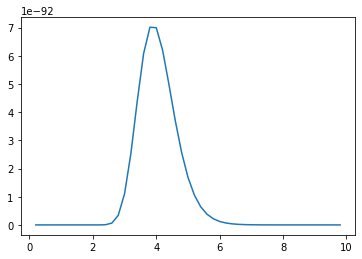

3.8000000000000003

In [19]:
#Plotting the posterior

a_ls=[]
a_val=[]
n=50 #number of points 
a_max=10 # max value of a
a_range=arange(0,a_max,a_max/n)

for a in a_range:
    if a==0:
        pass
    else:
        a_ls.append(a_fun(a,sumsq(x_points),len(x_points)))
        a_val.append(a)


plot(a_val,a_ls)
show()
a_val[a_ls.index(max(a_ls))] # print value with max probability

In [20]:

#Applying the Metropolis hasting algorithm to get Markov Chain
#def functions for algorithm
STDV=5
#generating function

def g(x_p,x_t):
    return 1/(2*pi*STDV)*exp(-(x_p-x_t)**2/(2*STDV**2))

#probability function 
def L(x):
    return 1000*random.uniform()


def acceptance(x_attempt, x_old):  # take the log
    return min(log(1),
               log( a_fun(x_attempt, sumsq(x_points), len(x_points)) )
               - log( a_fun(x_old, sumsq(x_points), len(x_points)) )
               + log(g(x_old, x_attempt)/g(x_attempt, x_old)))

def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]


C:\Users\rodri\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


3.93570111706915


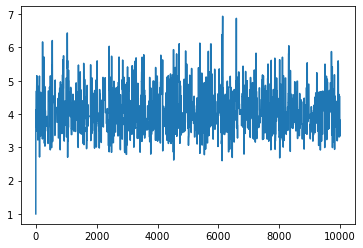

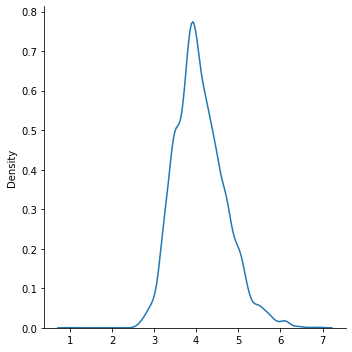

In [22]:

#Apply algorithm

x_current=1 # to keep track of current x (initialize to zero)
x_points_chain=[]

time=10000

for t in range(time):

    x_attempt=generate_g(x_current)

    acceptance_p=acceptance(x_attempt,x_current)

    u=log(random.uniform())

    if u<=acceptance_p:
        x_current=x_attempt

    #else the state stays the same

    x_points_chain.append(x_current)
    

plot(x_points_chain)
sns.displot(x_points_chain, kind='kde')

#most frequent value in the chain
print(most_frequent(x_points_chain))
show()